In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def read_pixel_values(file_path):
    with open(file_path, 'r') as file:
        pixel_values = file.read().split(', ')
        pixel_values = [int(val, 16) for val in pixel_values]
        print(len(pixel_values))
    return pixel_values

In [14]:
import numpy as np
from PIL import Image

rows = 144  # 60 for the complete image
columns = 176
file_path = 'image.txt'
pixel_data = read_pixel_values(file_path)

# Build the image array from the RGB565 format
# Build the RGB array
rgb = [0] * 3
# Build the Columns
rgb_columns = [rgb] * columns
# Build the Rows
image_array = [rgb_columns] * rows
image_array = np.array(image_array, dtype=np.uint8)

# Algorithm based on this site: http://www.barth-dev.de/online/rgb565-color-picker/
for x in range(0, rows):
    for y in range(0, columns):
        index = y + columns * x
        pixel = pixel_data[index]

        # Invert byte order
        # pixel = ((pixel_data[index] & 0xFF) << 8) | (pixel_data[index] >> 8)

        # Separate the colors
        R = pixel & 0b1111100000000000
        G = pixel & 0b0000011111100000
        B = pixel & 0b0000000000011111

        # Shift to the correct position
        image_array[x, y, 0] = R >> 8
        image_array[x, y, 1] = G >> 3
        image_array[x, y, 2] = B << 3

# Use PIL to create an image from the new array of pixels
new_image = Image.fromarray(image_array, "RGB")
new_image.save('new.png')

25344


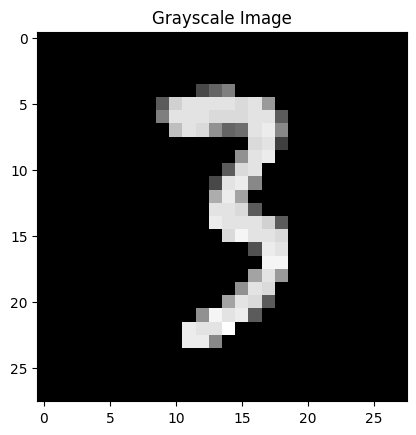

In [13]:
def display_grayscale_image(file_path, width, height):
    # Read the values from the text file
    with open(file_path, 'r') as file:
        content = file.read().split(', ')

    # Convert the values to a 2D NumPy array
    image_data = np.array([float(value) for value in content]).reshape(height, width)

    # Display the grayscale image
    plt.imshow(image_data, cmap='gray')
    plt.title('Grayscale Image')
    plt.show()

# Replace 'your_file.txt' with the actual file path, and specify the width and height of the image.
file_path = 'grayscale.txt'
image_width = 28  # Replace with the actual width of your image
image_height = 28  # Replace with the actual height of your image

display_grayscale_image(file_path, image_width, image_height)